### Multi Plots

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We saw in the last lecture that we can superimpose multiple plots on the same set of axes.

But we can also create multiple axes per figure, in a grid layout.

In [2]:
# mpl.style.available

In [3]:
mpl.style.use('seaborn-v0_8-dark')

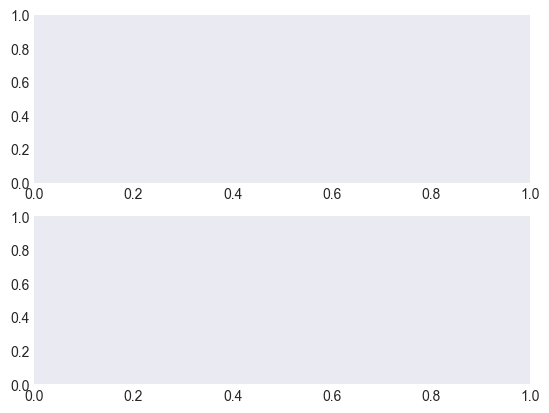

In [4]:
nrows = 2
ncols = 1
fig, axs = plt.subplots(nrows, ncols)

The returned axes are returned as a NumPy array, shaped based on the number of rows and columns specified when we create the plots:

In [5]:
type(axs), axs

(numpy.ndarray, array([<Axes: >, <Axes: >], dtype=object))

array([<Axes: >, <Axes: >], dtype=object)

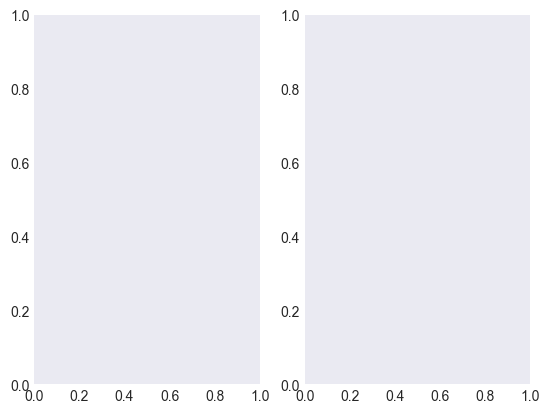

In [6]:
fig, axs = plt.subplots(1, 2)
axs

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

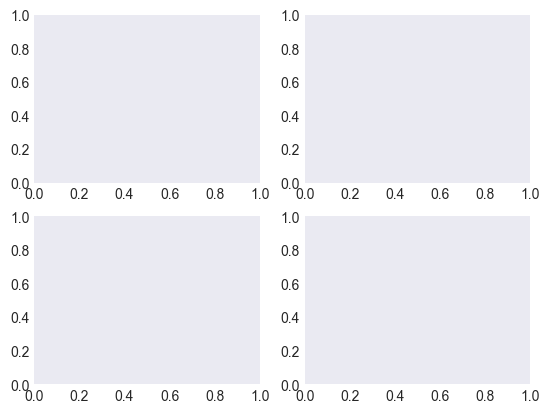

In [7]:
fig, axs = plt.subplots(2, 2)
axs

Sometimes it is easier to unpack the returned array:

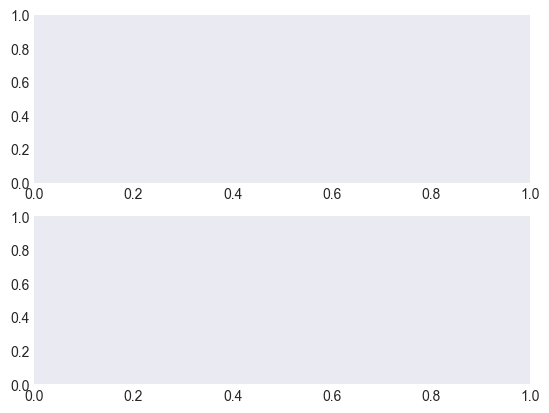

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1)

We can then add plots to each set of axes just like before:

In [9]:
x_axis = np.linspace(-2 * np.pi, 2 * np.pi, 200)

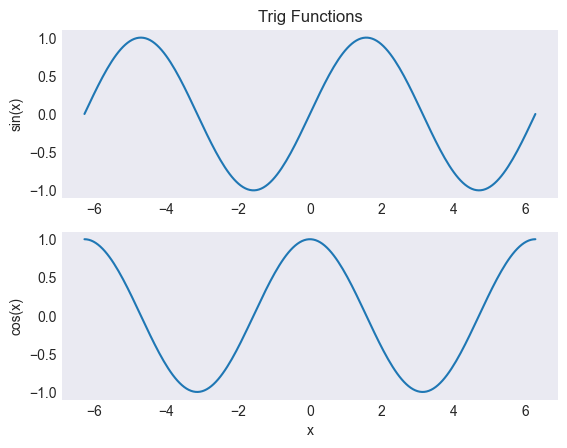

In [10]:
ax1.plot(x_axis, np.sin(x_axis), label='sin')
ax2.plot(x_axis, np.cos(x_axis), label='cos')
ax2.set_xlabel('x')
ax1.set_ylabel('sin(x)')
ax2.set_ylabel('cos(x)')
ax1.set_title('Trig Functions')
fig

This display is a bit small, but we can increase the displayed size:

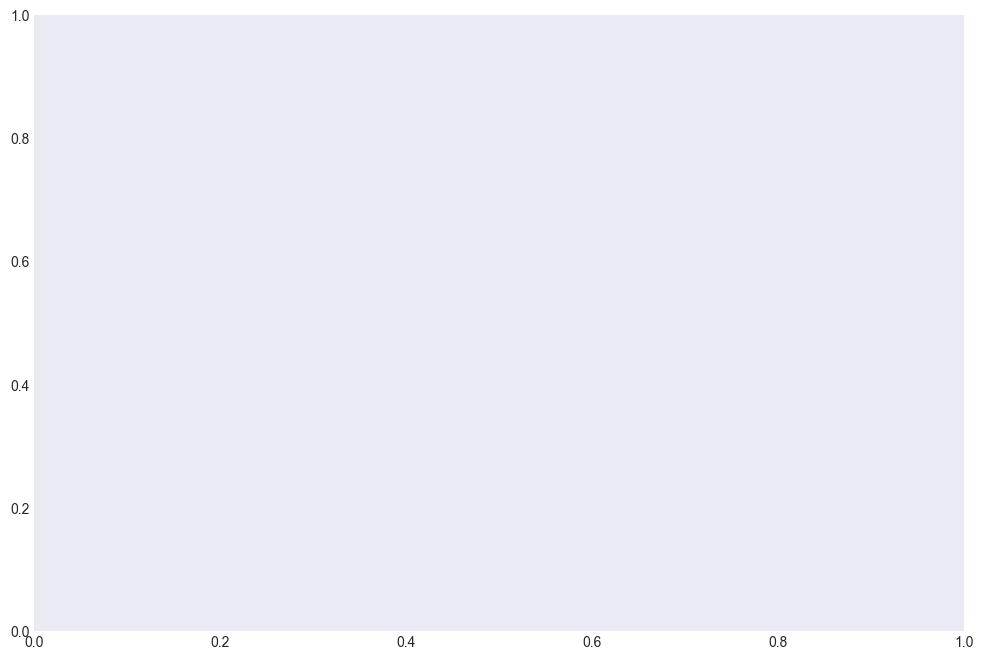

In [11]:
width = 12  
height = 8
fig, ax = plt.subplots(figsize=(width, height))

If we want this size to persists for all plots, we can just change the default `figsize`:

In [12]:
plt.rcParams['figure.figsize'] = [12, 8]

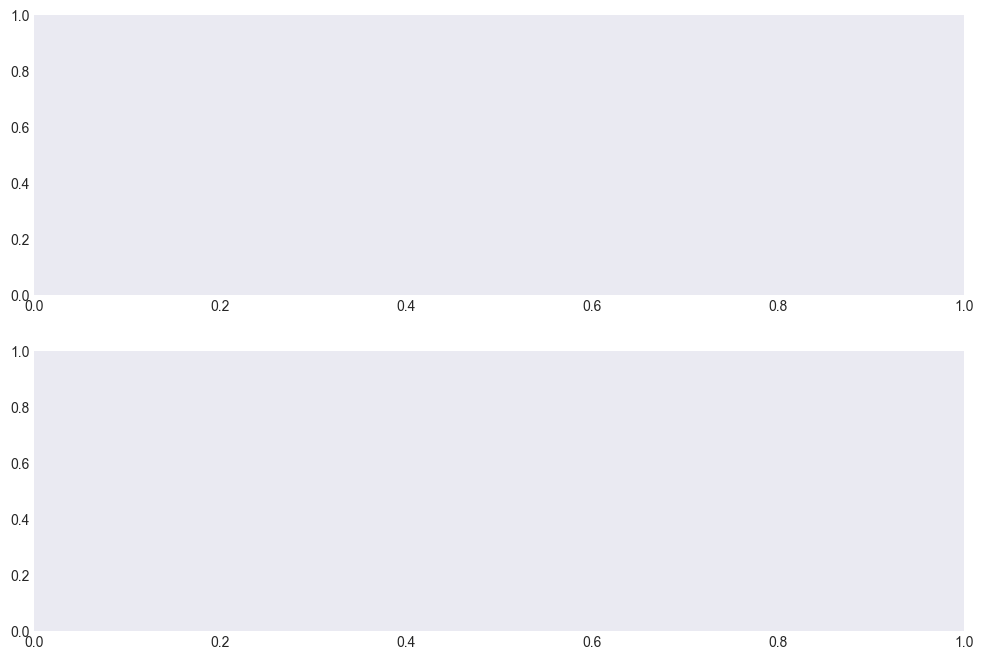

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1)

Let's redraw that plot:

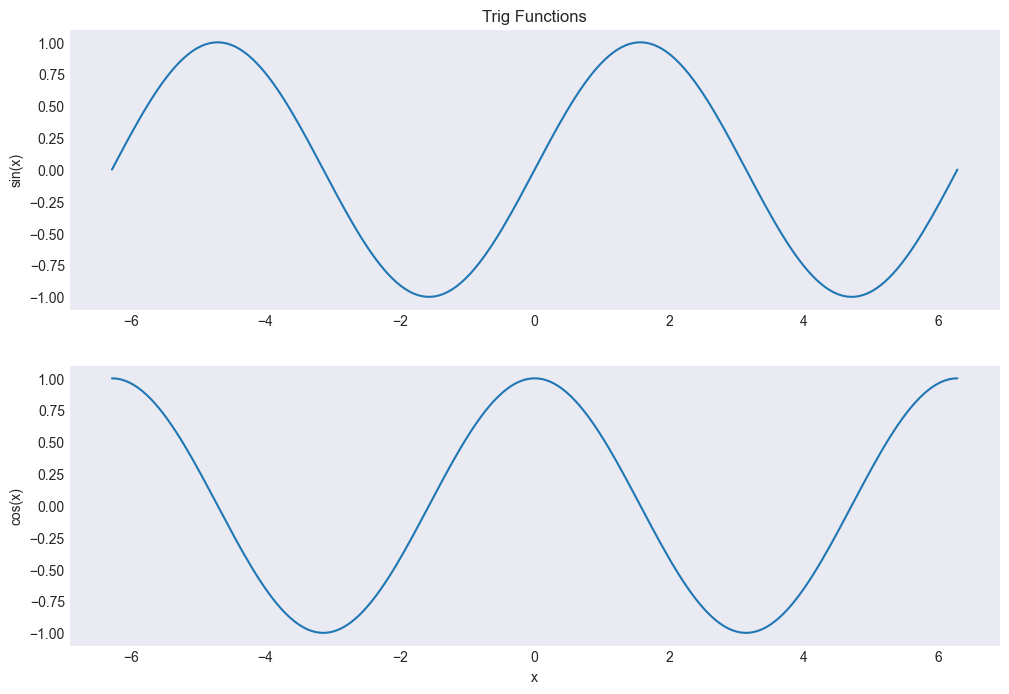

In [14]:
ax1.plot(x_axis, np.sin(x_axis), label='sin')
ax2.plot(x_axis, np.cos(x_axis), label='cos')
ax2.set_xlabel('x')
ax1.set_ylabel('sin(x)')
ax2.set_ylabel('cos(x)')
ax1.set_title('Trig Functions')
fig

So far we've been using NumPy arrays to create data to chart, but we can also use arrays loaded via Pandas.

In [15]:
df = pd.read_csv('DEXUSEU.csv')
df.iloc[:5, :]

,DATE,DEXUSEU
0,2015-04-03,1.0990
1,2015-04-06,1.1008
2,2015-04-07,1.0850
3,2015-04-08,1.0818
4,2015-04-09,1.0671


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     1306 non-null   object
 1   DEXUSEU  1306 non-null   object
dtypes: object(2)
memory usage: 20.5+ KB


In [17]:
df.describe(include='all')

,DATE,DEXUSEU
count,1306,1306
unique,1306,787
top,2015-04-03,.
freq,1,55


Let's first handle the DATE column - these were loaded as strings:

In [18]:
df.iloc[0, 0], type(df.iloc[0, 0])

('2015-04-03', str)

First thing we'll do, is convert that to actual datetimes:

In [19]:
pd.to_datetime(df['DATE'], errors='coerce')

0      2015-04-03
1      2015-04-06
2      2015-04-07
3      2015-04-08
4      2015-04-09
          ...    
1301   2020-03-30
1302   2020-03-31
1303   2020-04-01
1304   2020-04-02
1305   2020-04-03
Name: DATE, Length: 1306, dtype: datetime64[ns]

Then, we also have to convert the exchange rates to floats - you'll remember that we have some `.` points in the data - but this will actually work well for us - when we coerce the data to floats, the `.` will result in `NaN`:

In [20]:
rates = pd.to_numeric(df['DEXUSEU'], errors='coerce')
rates

0       1.0990
1       1.1008
2       1.0850
3       1.0818
4       1.0671
         ...  
1301    1.1018
1302    1.1016
1303    1.0934
1304    1.0862
1305    1.0797
Name: DEXUSEU, Length: 1306, dtype: float64

Now we have `NaN` data in our exchange rates:

In [21]:
rates[rates.isnull()]

36     NaN
65     NaN
111    NaN
136    NaN
158    NaN
169    NaN
190    NaN
195    NaN
206    NaN
226    NaN
301    NaN
326    NaN
371    NaN
396    NaN
420    NaN
429    NaN
451    NaN
456    NaN
466    NaN
470    NaN
491    NaN
561    NaN
587    NaN
631    NaN
656    NaN
680    NaN
689    NaN
711    NaN
716    NaN
726    NaN
751    NaN
821    NaN
848    NaN
891    NaN
916    NaN
941    NaN
949    NaN
958    NaN
971    NaN
972    NaN
977    NaN
986    NaN
991    NaN
1011   NaN
1013   NaN
1081   NaN
1109   NaN
1151   NaN
1181   NaN
1201   NaN
1214   NaN
1233   NaN
1238   NaN
1251   NaN
1271   NaN
Name: DEXUSEU, dtype: float64

We could drop the rows with `NaN`, but here I'll choose to use linear interpolation to fill the missing values:

In [22]:
rates.interpolate(method='linear')

0       1.0990
1       1.1008
2       1.0850
3       1.0818
4       1.0671
         ...  
1301    1.1018
1302    1.1016
1303    1.0934
1304    1.0862
1305    1.0797
Name: DEXUSEU, Length: 1306, dtype: float64

Let's build our new data set:

In [23]:
data = pd.concat(
    [
        pd.to_datetime(df['DATE'], errors='coerce'),
        pd.to_numeric(
            df['DEXUSEU'], errors='coerce'
        ).interpolate(method='linear')
    ],
    axis=1
)
data[:5]

,DATE,DEXUSEU
0,2015-04-03,1.0990
1,2015-04-06,1.1008
2,2015-04-07,1.0850
3,2015-04-08,1.0818
4,2015-04-09,1.0671


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1306 non-null   datetime64[ns]
 1   DEXUSEU  1306 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.5 KB


So now we want to chart the exchange rate. Matplotlib does not always work well with Pandas series objects, so we should convert our series to regular NumPy arrays before we plot the data (we use the `.values` attribute):

In [25]:
data['DATE'].values

array(['2015-04-03T00:00:00.000000000', '2015-04-06T00:00:00.000000000',
       '2015-04-07T00:00:00.000000000', ...,
       '2020-04-01T00:00:00.000000000', '2020-04-02T00:00:00.000000000',
       '2020-04-03T00:00:00.000000000'],
      shape=(1306,), dtype='datetime64[ns]')

In [26]:
data['DEXUSEU'].values

array([1.099 , 1.1008, 1.085 , ..., 1.0934, 1.0862, 1.0797], shape=(1306,))

Text(0.5, 1.0, 'US/EU Exchange Rate')

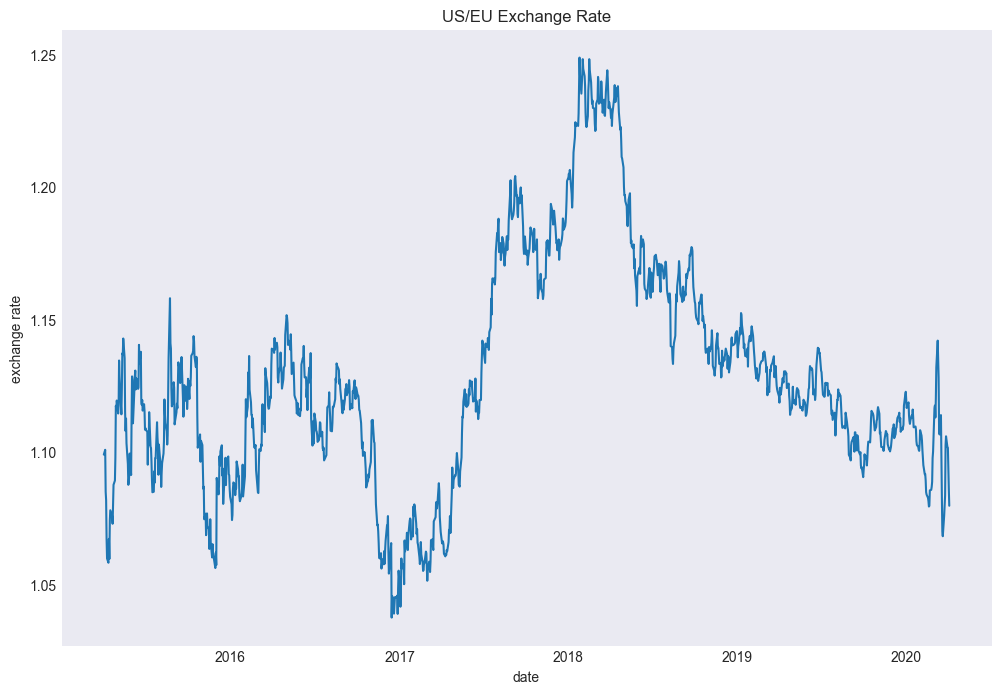

In [27]:
fig, ax = plt.subplots()
ax.plot(data['DATE'].values, data['DEXUSEU'].values, label='rate')
ax.set_xlabel('date')
ax.set_ylabel('exchange rate')
ax.set_title('US/EU Exchange Rate')

Now it might be nice to add a moving average to the data and plot that on the same chart.

Pandas has a `.rolling()` method that essentially groups data in a rolling window, and we can then calculate the mean in each window:

In [28]:
m5_avg = data['DEXUSEU'].rolling(window=5).mean()
m5_avg

0           NaN
1           NaN
2           NaN
3           NaN
4       1.08674
         ...   
1301    1.09462
1302    1.09906
1303    1.10104
1304    1.09778
1305    1.09254
Name: DEXUSEU, Length: 1306, dtype: float64

Text(0.5, 1.0, 'US/EU Exchange Rate')

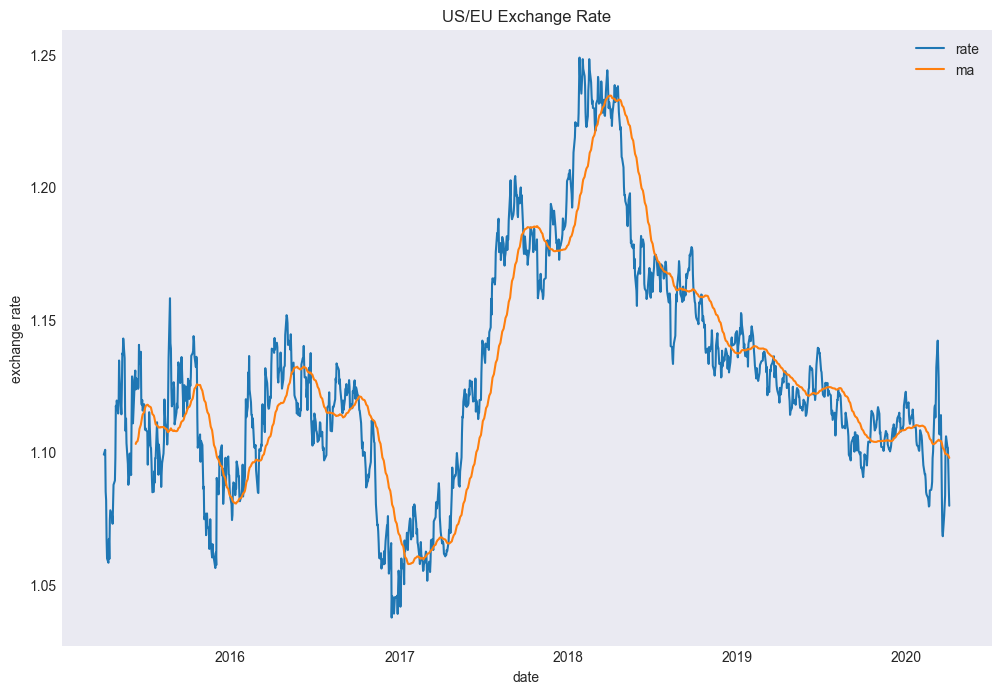

In [29]:
fig, ax = plt.subplots()
ax.plot(
    data['DATE'].values, 
    data['DEXUSEU'].values, 
    label='rate'
)
ax.plot(
    data['DATE'].values, 
    data['DEXUSEU'].rolling(window=50).mean(), 
    label='ma'
)
ax.set_xlabel('date')
ax.set_ylabel('exchange rate')
ax.legend()
ax.set_title('US/EU Exchange Rate')

(if you're wondering why we're seeing that `Text(...)` line above our chart, that's Jupyter printing out the last result (which was setting the title):

In [30]:
ax.set_title('US/EU Exchange Rate')

Text(0.5, 1.0, 'US/EU Exchange Rate')

A simple way to not show this output is simply to have Jupyter not print out the result of that last `set_title` call. We can do that by having Jupyter print something else out, like `None`:

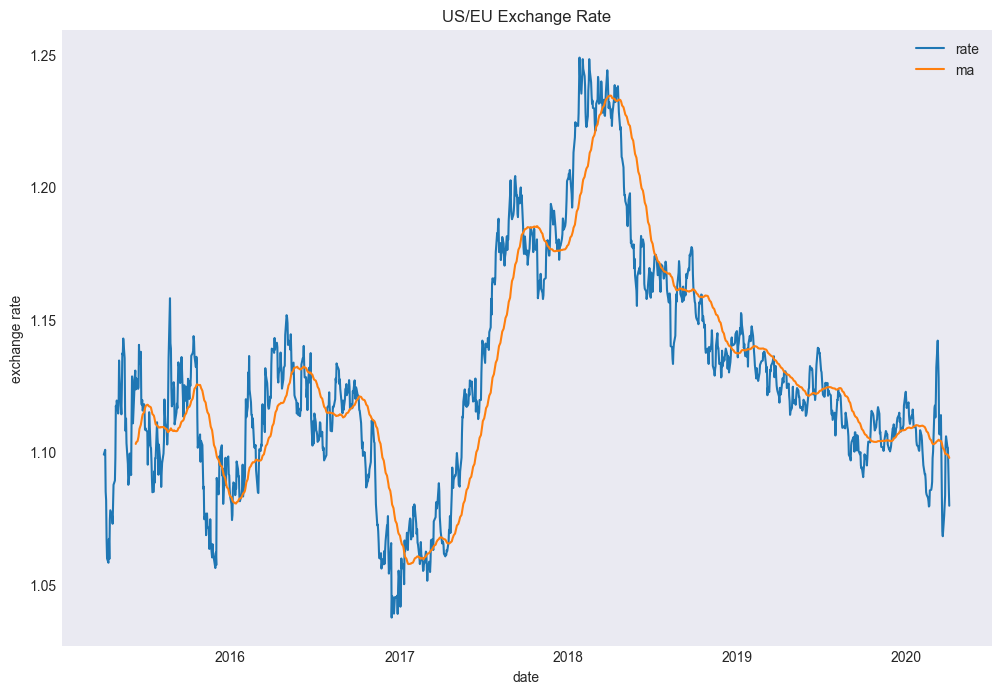

In [31]:
fig, ax = plt.subplots()
ax.plot(
    data['DATE'].values, 
    data['DEXUSEU'].values, 
    label='rate'
)
ax.plot(
    data['DATE'].values, 
    data['DEXUSEU'].rolling(window=50).mean(), 
    label='ma'
)
ax.set_xlabel('date')
ax.set_ylabel('exchange rate')
ax.legend()
ax.set_title('US/EU Exchange Rate')
None

We could also add a secondary chart below the main one:

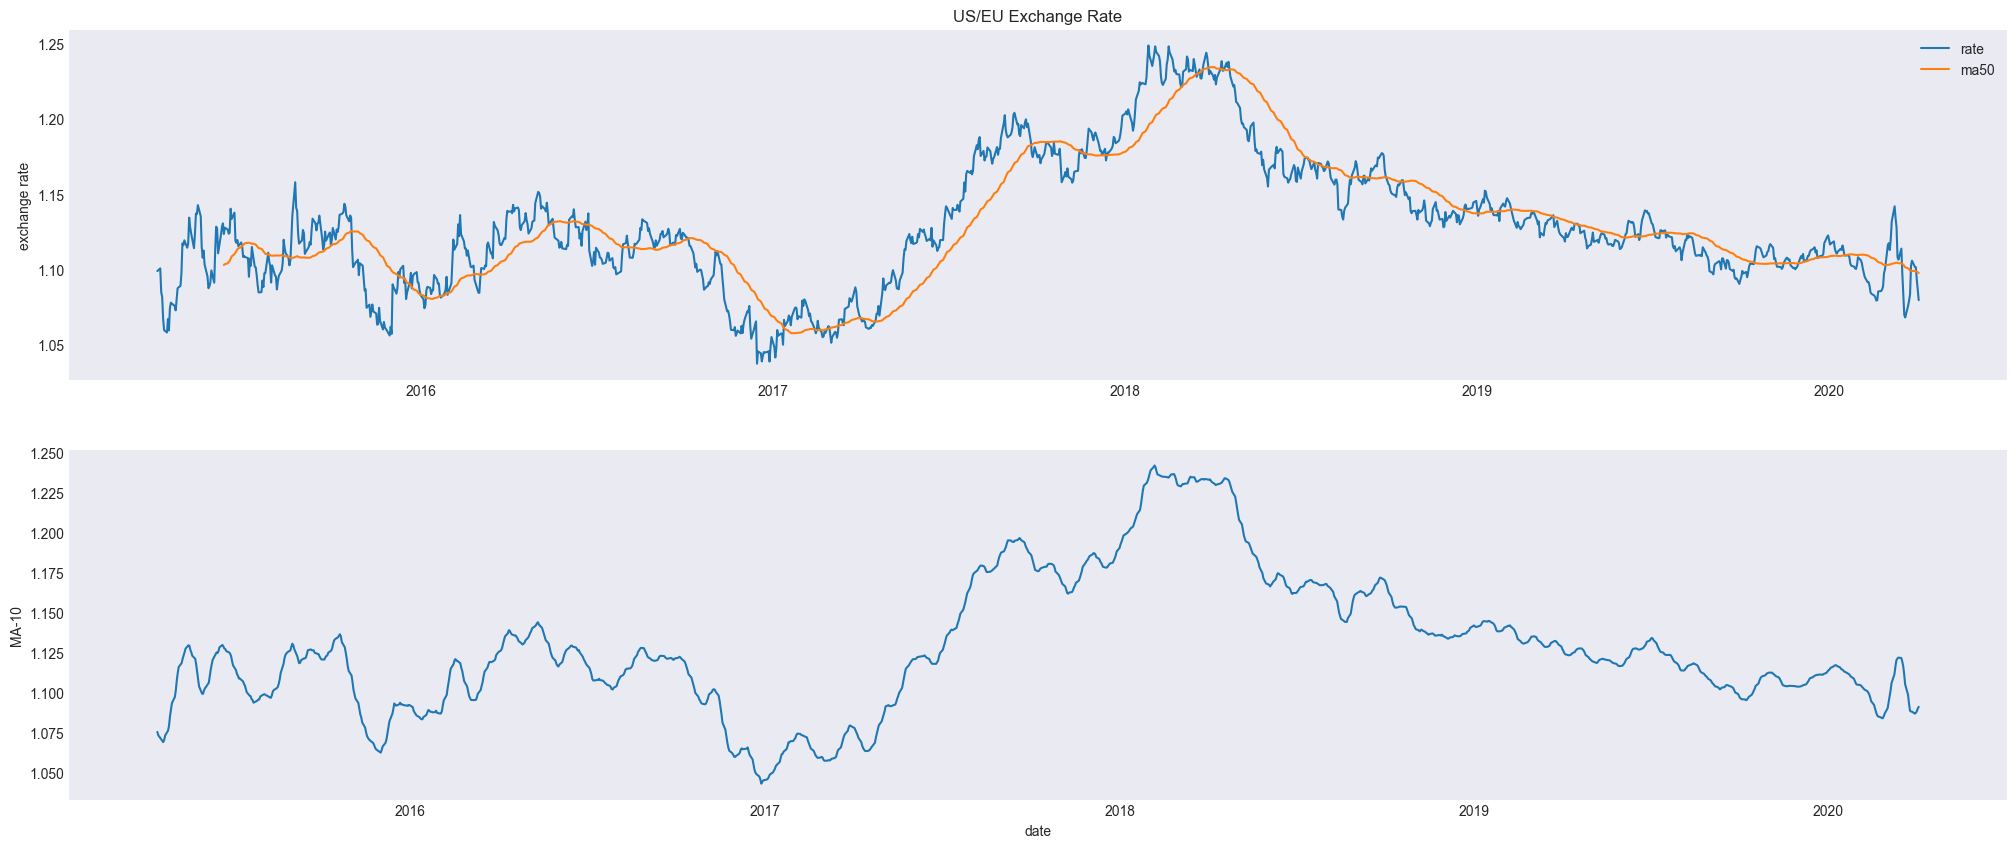

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10))
ax1.plot(
    data['DATE'].values,
    data['DEXUSEU'].values,
    label='rate',
)
ax1.plot(
    data['DATE'].values,
    data['DEXUSEU'].rolling(window=50).mean(),
    label='ma50'
)
ax2.plot(
    data['DATE'].values,
    data['DEXUSEU'].rolling(window=10).mean(),
    label='ma10'
)
ax2.set_xlabel('date')
ax1.set_ylabel('exchange rate')
ax2.set_ylabel('MA-10')
ax1.set_title('US/EU Exchange Rate')
ax1.legend()

None